In [1]:
# import pickle

import pandas as pd
import numpy as np
from data_transformer import DataTransformer, Timestamp

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
path = './uci_ml_hackathon_fire_dataset_2012-05-09_2013-01-01_10k_train.hdf5'
dataset = DataTransformer(path)
dataset.data_ensemble()

VIIRS_imgs: (10000, 5, 30, 30)
LDSCP_imgs: (10000, 17, 30, 30)
METEO_imgs: (10000, 2, 5, 30, 30)


In [9]:
indices = dataset.filter_fire_idx(30)

target_n12hrs = np.take(dataset.get_target_data(Timestamp.n12hrs), indices, axis=0)
input_n0hrs = np.take(dataset.get_obs_input_data(Timestamp.n0hrs), indices, axis=0)
target_n0hrs = np.take(dataset.get_target_data(Timestamp.n0hrs), indices, axis=0)
target_p12hrs = np.take(dataset.get_target_data(Timestamp.p12hrs), indices, axis=0)

display(input_n0hrs.shape, target_n0hrs.shape, target_p12hrs.shape)

(1218, 30, 30, 37)

(1218, 30, 30)

(1218, 30, 30)

In [10]:
n_rows = input_n0hrs.shape[0] * input_n0hrs.shape[1] * input_n0hrs.shape[2]
n_cols = input_n0hrs.shape[3]
X = pd.DataFrame(input_n0hrs.reshape((n_rows, n_cols)))
X.fillna(0, inplace=True)
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0000,0.0,0.0,290.599854,57.0,0.710792,-1.795012,1.930619,2.764555,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0384,0.0,0.0,290.599854,57.0,0.710792,-1.795012,1.930619,2.764555,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0000,0.0,0.0,290.599854,57.0,0.710792,-1.795012,1.930619,2.764555,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0096,0.0,0.0,290.599854,57.0,0.710792,-1.795012,1.930619,2.764555,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0000,0.0,0.0,290.599854,57.0,0.710792,-1.795012,1.930619,2.764555,0.0
5,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0000,0.0,0.0,290.599854,57.0,0.710792,-1.795012,1.930619,2.764555,0.0
6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0256,0.0,0.0,290.599854,57.0,0.710792,-1.795012,1.930619,2.764555,0.0
7,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0032,0.0,0.0,290.599854,57.0,0.710792,-1.795012,1.930619,2.764555,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0992,0.0,0.0,290.599854,57.0,0.710792,-1.795012,1.930619,2.764555,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1248,0.0,0.0,290.599854,57.0,0.710792,-1.795012,1.930619,2.764555,0.0


In [11]:
Y_p12hrs = pd.DataFrame(target_n0hrs.reshape(n_rows, 1))
Y_p24hrs = pd.DataFrame(target_n12hrs.reshape(n_rows, 1))

In [12]:
X_train_p12hrs, X_test_p12hrs, Y_train_p12hrs, Y_test_p12hrs = train_test_split(X, Y_p12hrs)
X_train_p24hrs, X_test_p24hrs, Y_train_p24hrs, Y_test_p24hrs = train_test_split(X, Y_p24hrs)

In [13]:
X_train_p12hrs.shape, X_test_p12hrs.shape, Y_train_p12hrs.shape, Y_test_p12hrs.shape

((822150, 37), (274050, 37), (822150, 1), (274050, 1))

In [14]:
# model = RandomForestRegressor()

model_p12hrs = XGBRegressor(
    max_depth = 8,
    objective='binary:logistic',
    eval_metric='auc',
    learning_rate=0.2,
    n_estimators=1000,
)
model_p24hrs = XGBRegressor(
    max_depth = 8,
    objective='binary:logistic',
    eval_metric='auc',
    learning_rate=0.2,
    n_estimators=1000,
)

In [15]:
model_p12hrs.fit(X_train_p12hrs, Y_train_p12hrs)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='auc', gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='binary:logistic',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [16]:
model_p24hrs.fit(X_train_p24hrs, Y_train_p24hrs)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='auc', gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='binary:logistic',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [24]:
Y_tt_p24hrs = model_p12hrs.predict(X_test_p24hrs)
# Y_tt_p24hrs = model_p24hrs.predict(X_test_p24hrs)

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

# display(roc_auc_score(Y_test_p12hrs, Y_tt_p12hrs))
# curve_p12hrs = roc_curve(Y_test_p12hrs, Y_tt_p12hrs)

display(roc_auc_score(Y_test_p24hrs, Y_tt_p24hrs))
curve_p12hrs = roc_curve(Y_test_p24hrs, Y_tt_p24hrs)


1.0

In [54]:
# X_meow = t1[0].reshape((30 * 30, 37))
X_samples = [pd.DataFrame(np.concatenate(input_n0hrs[i], axis=0)) for i in range(950,1050,10)]

In [55]:
Y_samples = [model_p12hrs.predict(X_samples[i]).reshape((30,30)) for i in range(10)]

In [56]:
FIG_REG_WIDTH = 7
FIG_REG_ASPECT_RATIO = 1.75

def set_fig_settings(fig_size=(32,10), font_size=16, font_scale=1.6):       
    plt.rcParams['figure.figsize'] = fig_size
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams["legend.framealpha"] = 0

    font = {'weight' : 'normal', 'size'   : font_size}

    plt.rc('font', **font)

<Figure size 1008x630 with 0 Axes>

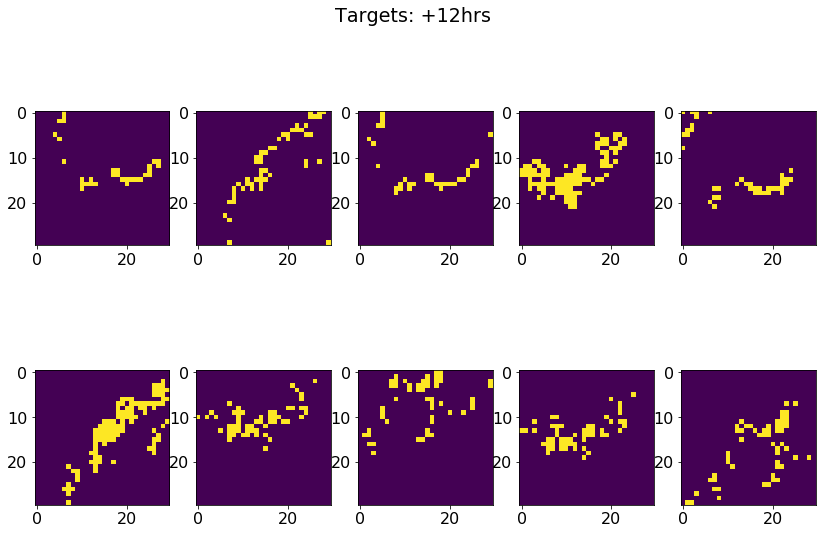

In [57]:
X_target = [np.concatenate(target_n0hrs[i], axis=0).reshape((30,30)) for i in range(950,1050,10)]

set_fig_settings((FIG_REG_WIDTH*2,FIG_REG_WIDTH*1.25))
X_target_binary = [X_target[i] > 0.35 for i in range(10)]

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,5) 
f.suptitle(f'Targets: +12hrs')
for i in range(5):
    axarr[0,i].imshow(X_target_binary[i])
for i in range(5,10):
    axarr[1,i-5].imshow(X_target_binary[i])

<Figure size 1008x630 with 0 Axes>

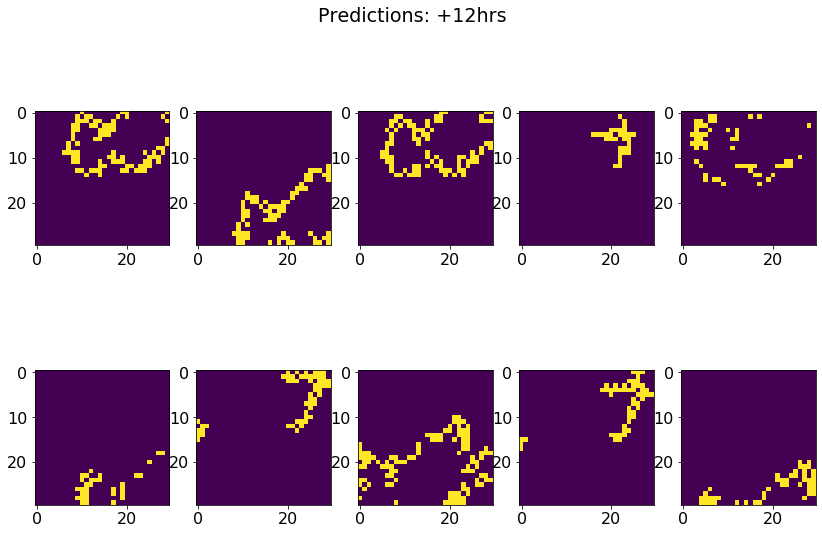

In [58]:
set_fig_settings((FIG_REG_WIDTH*2,FIG_REG_WIDTH*1.25))
Y_pred = [Y_samples[i] > 0.32 for i in range(10)]

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,5) 
f.suptitle(f'Predictions: +12hrs')
for i in range(5):
    axarr[0,i].imshow(Y_pred[i])
for i in range(5,10):
    axarr[1,i-5].imshow(Y_pred[i])

<Figure size 1008x630 with 0 Axes>

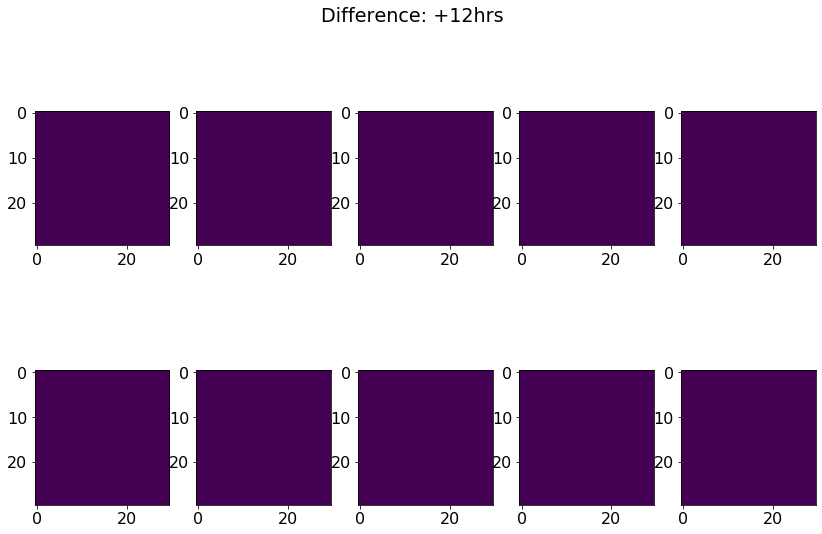

In [59]:
X_target = [np.concatenate(target_n12hrs[i], axis=0).reshape((30,30)) for i in range(950,1050,10)]

set_fig_settings((FIG_REG_WIDTH*2,FIG_REG_WIDTH*1.25))
X_target_binary = [X_target[i] > 0.35 for i in range(10)]

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,5) 
f.suptitle(f'Difference: +12hrs')
for i in range(5):
    axarr[0,i].imshow(np.bitwise_xor(X_target_binary[i], Y_pred[i]))
for i in range(5,10):
    axarr[1,i-5].imshow(np.bitwise_xor(X_target_binary[i], Y_pred[i]))